<a href="https://colab.research.google.com/github/VansheekaPachauree/Sentiment-Analysis-Topic-Modelling/blob/main/TeacherModel_apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
import google.auth

# Get the authenticated credentials after auth.authenticate_user() has run
credentials, project_id = google.auth.default()

# Authorize gspread with the obtained credentials using 'auth' parameter
gc = gspread.Client(auth=credentials)

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yspvEhxRSlZPwk2AJsvvsxmFPAlvS9WRoQbN6tpLVn8/edit?gid=0#gid=0'
sheet = gc.open_by_url(sheet_url)
worksheet = sheet.sheet1
data = worksheet.get_all_records()

In [ ]:
apple_df = pd.DataFrame(data)

In [ ]:
apple_df.shape

(21471, 6)

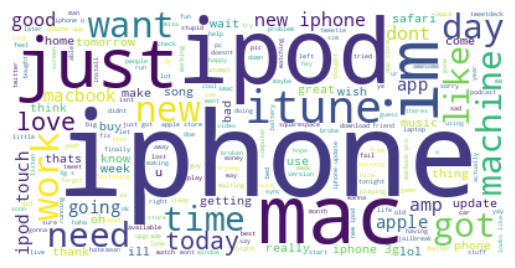

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

my_stopwords = set(ENGLISH_STOP_WORDS)

apple_text = ' '.join(apple_df['clean_text'])
apple_cloud = WordCloud(background_color = 'white', stopwords = my_stopwords).generate(apple_text)
plt.imshow(apple_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
from transformers import pipeline
sentiment = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest', tokenizer = 'cardiffnlp/twitter-roberta-base-sentiment-latest')
text_string = apple_df['clean_text'].tolist()
clean_text_sentiment = sentiment(text_string)
apple_df['Sentiment'] = [each_dict["label"] for each_dict in clean_text_sentiment]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=apple_df)

https://docs.google.com/spreadsheets/d/1wHBZuF7xH-Z5ATTy9CEevhQYiOKSJFx7Ondo3T_oYI4/edit#gid=0


In [ ]:
# ============================================================
# 🔍 Identify Tweets Mislabelled Before But Correctly Labelled Now
# ============================================================

# First: map the original target column (0,2,4) to text labels
target_map = {
    0: "negative",
    2: "neutral",
    4: "positive"
}

if "target" in apple_df.columns and "Sentiment" in apple_df.columns:

    apple_df["original_label"] = apple_df["target"].map(target_map)

    # Rows where labels changed
    df_mislabeled = apple_df[apple_df["original_label"] != apple_df["Sentiment"]].copy()

    # Summary
    print("\n🔹 Total corrected labels:", len(df_mislabeled))

    print("\n🔹 Label changes summary:")
    print(df_mislabeled.groupby(["original_label", "Sentiment"]).size())

    # Show sample corrected tweets
    examples = df_mislabeled.sample(min(40, len(df_mislabeled)), random_state=42)

    print("\n\n🔹 Example tweets that were mislabelled before but corrected by transformer:\n")
    for i, row in examples.iterrows():
        print(f"Tweet: {row['clean_text']}")
        print(f"Original Label ➜ {row['original_label']}")
        print(f"Corrected Label ➜ {row['Sentiment']}")
        print("-" * 80)

else:
    print("❌ Columns 'target' and/or 'Sentiment' not found. Cannot compute mislabelled examples.")



🔹 Total corrected labels: 9660

🔹 Label changes summary:
original_label  Sentiment
negative        neutral      3883
                positive     1744
positive        negative      847
                neutral      3186
dtype: int64


🔹 Example tweets that were mislabelled before but corrected by transformer:

Tweet: trying os30 on ipod touchbluetooth wont connect to camera otherwise good
Original Label ➜ negative
Corrected Label ➜ neutral
--------------------------------------------------------------------------------
Tweet: following for live updates wwdc next week
Original Label ➜ positive
Corrected Label ➜ neutral
--------------------------------------------------------------------------------
Tweet: when you find it let me know its not on itunes yet
Original Label ➜ negative
Corrected Label ➜ neutral
--------------------------------------------------------------------------------
Tweet: work ipod work
Original Label ➜ negative
Corrected Label ➜ neutral
----------------------------

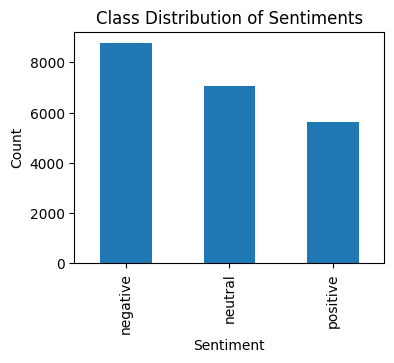

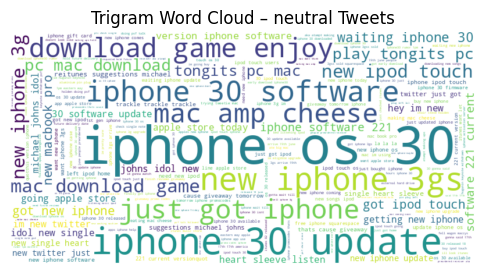

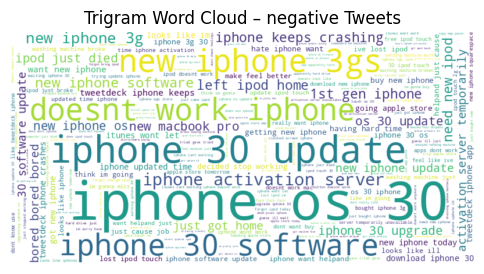

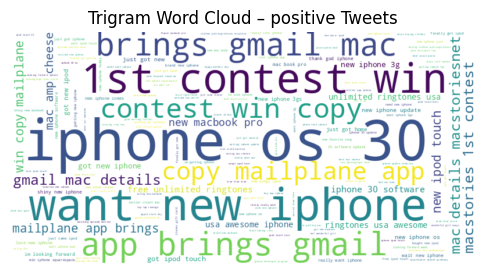


🔹 Top 5 Words for Sentiment 'neutral':
   iphone: 2491
   ipod: 1008
   mac: 923
   just: 655
   new: 642

🔹 Top 5 Words for Sentiment 'negative':
   iphone: 3178
   ipod: 1553
   im: 943
   mac: 918
   just: 901

🔹 Top 5 Words for Sentiment 'positive':
   iphone: 1772
   ipod: 836
   mac: 797
   new: 715
   im: 627


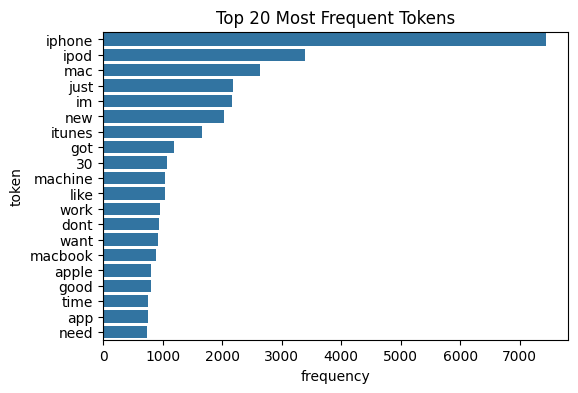

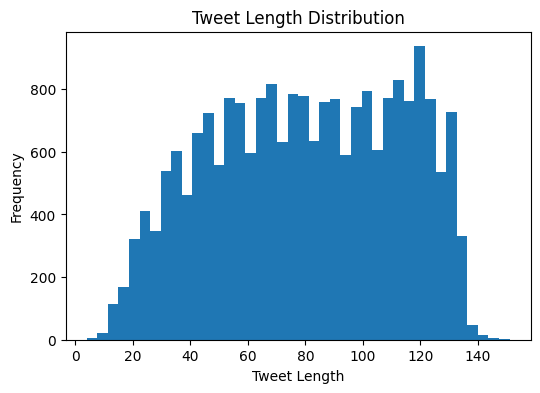

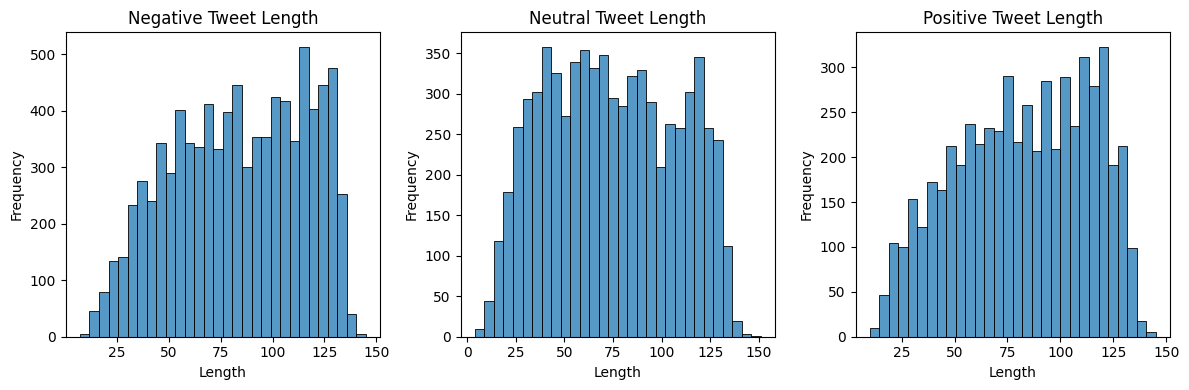


🔹 Top 20 Bigrams:
[('new iphone', np.int64(645)), ('ipod touch', np.int64(518)), ('iphone 30', np.int64(411)), ('apple store', np.int64(313)), ('iphone 3gs', np.int64(261)), ('iphone 3g', np.int64(257)), ('os 30', np.int64(245)), ('iphone os', np.int64(242)), ('macbook pro', np.int64(219)), ('iphone app', np.int64(217)), ('just got', np.int64(208)), ('want iphone', np.int64(171)), ('iphone update', np.int64(157)), ('app store', np.int64(155)), ('new ipod', np.int64(136)), ('im going', np.int64(126)), ('looks like', np.int64(122)), ('mac cheese', np.int64(119)), ('doesnt work', np.int64(119)), ('washing machine', np.int64(112))]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

# Ensure sentiment column is string/categorical
apple_df['Sentiment'] = apple_df['Sentiment'].astype(str)

# ----------------------------------
# 1️⃣ Class Distribution (Bar Plot)
# ----------------------------------
plt.figure(figsize=(4,3))
apple_df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Class Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ----------------------------------
# 2️⃣ Word Clouds per Sentiment (Bigrams instead of single words)
# ----------------------------------
from sklearn.feature_extraction.text import CountVectorizer

sentiments = apple_df['Sentiment'].unique()

for s in sentiments:
    # Filter tweets for this sentiment
    text_series = apple_df[apple_df['Sentiment'] == s]['clean_text'].astype(str)

    # Create bigrams using CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
    X = vectorizer.fit_transform(text_series)

    # Sum frequencies of bigrams
    bigram_freq = X.sum(axis=0).A1
    bigram_words = vectorizer.get_feature_names_out()

    # Create dictionary for word cloud: {"bigram phrase": count}
    freq_dict = {bigram_words[i]: bigram_freq[i] for i in range(len(bigram_words))}

    # Generate WordCloud from bigram frequencies
    wc = WordCloud(width=800, height=400,
                   background_color='white').generate_from_frequencies(freq_dict)

    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Trigram Word Cloud – {s} Tweets")
    plt.show()


# ----------------------------------
# 6️⃣ Top 5 Most Frequent Words Per Sentiment
# ----------------------------------

from collections import Counter

top_words_per_sentiment = {}

for s in sentiments:
    # Extract only the text for this sentiment
    text_series = apple_df[apple_df['Sentiment'] == s]['clean_text'].astype(str)

    # Join into one blob and split into tokens
    all_words = " ".join(text_series).lower().split()

    # Remove common stopwords
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    filtered_words = [w for w in all_words if w not in ENGLISH_STOP_WORDS]

    # Count frequencies
    word_counts = Counter(filtered_words)
    top5 = word_counts.most_common(5)

    top_words_per_sentiment[s] = top5

# Print results
for sentiment, words in top_words_per_sentiment.items():
    print(f"\n🔹 Top 5 Words for Sentiment '{sentiment}':")
    for word, freq in words:
        print(f"   {word}: {freq}")


# ----------------------------------
# 3️⃣ Top 20 Most Frequent Tokens
# ----------------------------------
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(apple_df['clean_text'].astype(str))

word_freq = np.asarray(X.sum(axis=0)).flatten()
freq_df = pd.DataFrame({"token": cv.get_feature_names_out(), "frequency": word_freq})
top20 = freq_df.sort_values(by="frequency", ascending=False).head(20)

plt.figure(figsize=(6,4))
sns.barplot(data=top20, x="frequency", y="token")
plt.title("Top 20 Most Frequent Tokens")
plt.show()

# ----------------------------------
# 4️⃣ Tweet Length Distribution
# ----------------------------------
apple_df['tweet_length'] = apple_df['clean_text'].astype(str).apply(len)

plt.figure(figsize=(6,4))
plt.hist(apple_df['tweet_length'], bins=40)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

sentiments = ['negative', 'neutral', 'positive']
titles = {'negative': "Negative", 'neutral': "Neutral", 'positive': "Positive"}

plt.figure(figsize=(12, 4))

for i, s in enumerate(sentiments):
    plt.subplot(1, 3, i+1)
    sns.histplot(
        apple_df[apple_df['Sentiment'] == s]['tweet_length'],
        bins=30,
        kde=False
    )
    plt.title(f"{titles[s]} Tweet Length")
    plt.xlabel("Length")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ============================
# 🔹 ADVANCED EDA ADD-ONS
# ============================

# ----------------------------------
# 5️⃣ Most Common Bigrams / Trigrams
# ----------------------------------
def get_top_ngrams(corpus, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(freq, key=lambda x: x[1], reverse=True)[:top_k]

print("\n🔹 Top 20 Bigrams:")
print(get_top_ngrams(apple_df['clean_text'], n=2))


/tmp/ipython-input-1791502856.py:3: FutureWarning: Parsed string "Mon Apr 06 22:30:50 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  apple_df['clean_date'] = pd.to_datetime(apple_df['date'], errors='coerce')


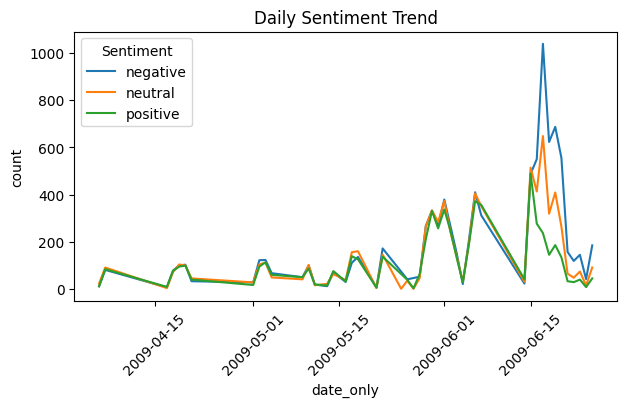

In [ ]:
# Convert date
if 'date' in apple_df.columns:
    apple_df['clean_date'] = pd.to_datetime(apple_df['date'], errors='coerce')
    apple_df['date_only'] = apple_df['clean_date'].dt.date

    # Group by date and sentiment
    daily_trend = apple_df.groupby(['date_only', 'Sentiment']).size().reset_index(name='count')

    # Plot
    plt.figure(figsize=(7,3.5))
    sns.lineplot(data=daily_trend, x='date_only', y='count', hue='Sentiment')
    plt.title("Daily Sentiment Trend")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⛔ No date column found — skipping time-based trend.")


In [ ]:
filtered_df = apple_df[apple_df['clean_date'] > '2009-06-15']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

def generate_trigram_wordcloud(text_series, title="Trigram Word Cloud"):
    # Create trigram vectorizer
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(text_series)
    bag = vec.transform(text_series)

    # Count trigram frequencies
    sum_words = bag.sum(axis=0)
    trigram_freq = {word: sum_words[0, idx] for word, idx in vec.vocabulary_.items()}

    # Generate WordCloud from trigram frequencies
    wc = WordCloud(width=800, height=400, background_color='white')
    wc = wc.generate_from_frequencies(trigram_freq)

    # Plot
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=11)
    plt.show()

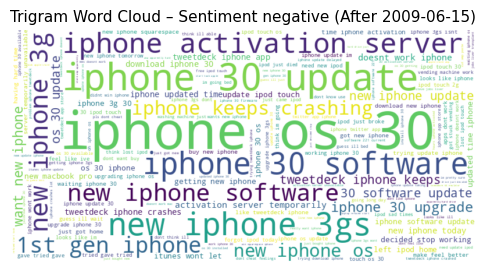

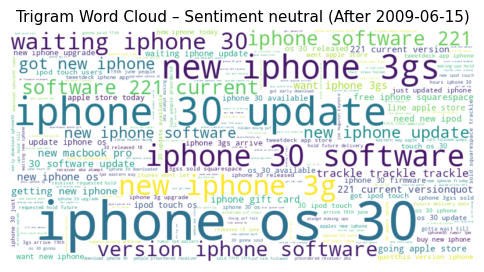

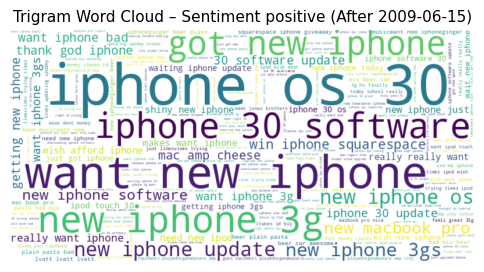

In [ ]:
for s in filtered_df['Sentiment'].unique():
    temp = filtered_df[filtered_df['Sentiment'] == s]['clean_text']
    generate_trigram_wordcloud(
        temp,
        title=f"Trigram Word Cloud – Sentiment {s} (After 2009-06-15)"
    )